# Visialization of cine-MRI data and abdominal cavity segmentation

In [1]:
from pathlib import Path
import random
import numpy as np
import matplotlib.pyplot as plt
import SimpleITK as sitk
from cinemri.utils import Patient, get_patients 
from seg_dataloader import SegmentationDataset
%matplotlib inline

# TODO refactor and maybe show some metadata

### Setting seed for reproducibility

In [2]:
np.random.seed(99)
random.seed(99)

### Extracting the patients and visualizing random scans

In [3]:
archive_path = Path("../../data/cinemri_mha/rijnstate")
images_folder = "images"
patients = get_patients(archive_path, images_folder=images_folder)
N = 5
patients_to_show = random.sample(patients, N)

In [4]:
def get_random_slice(archive_path, images_folder, patients):
    patient = random.sample(patients, 1)[0]
    cinemri_slice = random.sample(patient.cinemri_slices, 1)[0]
    slice_path = cinemri_slice.build_path(archive_path / images_folder)
    
    slice = sitk.ReadImage(str(slice_path))
    slice_np = sitk.GetArrayFromImage(slice)
    
    return (patient.id, cinemri_slice.scan_id, cinemri_slice.slice_id, slice_np)

In [5]:
# A function to show 6 frames of a slice of cine-MRI scan
def show_frames(series, frames = [0, 6, 12, 18, 24, 29]):
    nrow = 2
    ncol = 3

    plt.figure(figsize=(20,15))
    pos = 0
    for i in range(nrow):
        for j in range(ncol):
            image = series[frames[pos]]
            
            pos += 1
            plt.subplot(nrow, ncol, pos)
            plt.imshow(image, cmap="gray")
            plt.axis('off')
            plt.title('Frame {}'.format(frames[pos - 1] + 1))

    plt.show()

Patient ANON7V03RE1ON, scan 1.2.752.24.7.621449243.4517138, slice 1.3.12.2.1107.5.2.30.26380.2019052715240711198162260.0.0.0


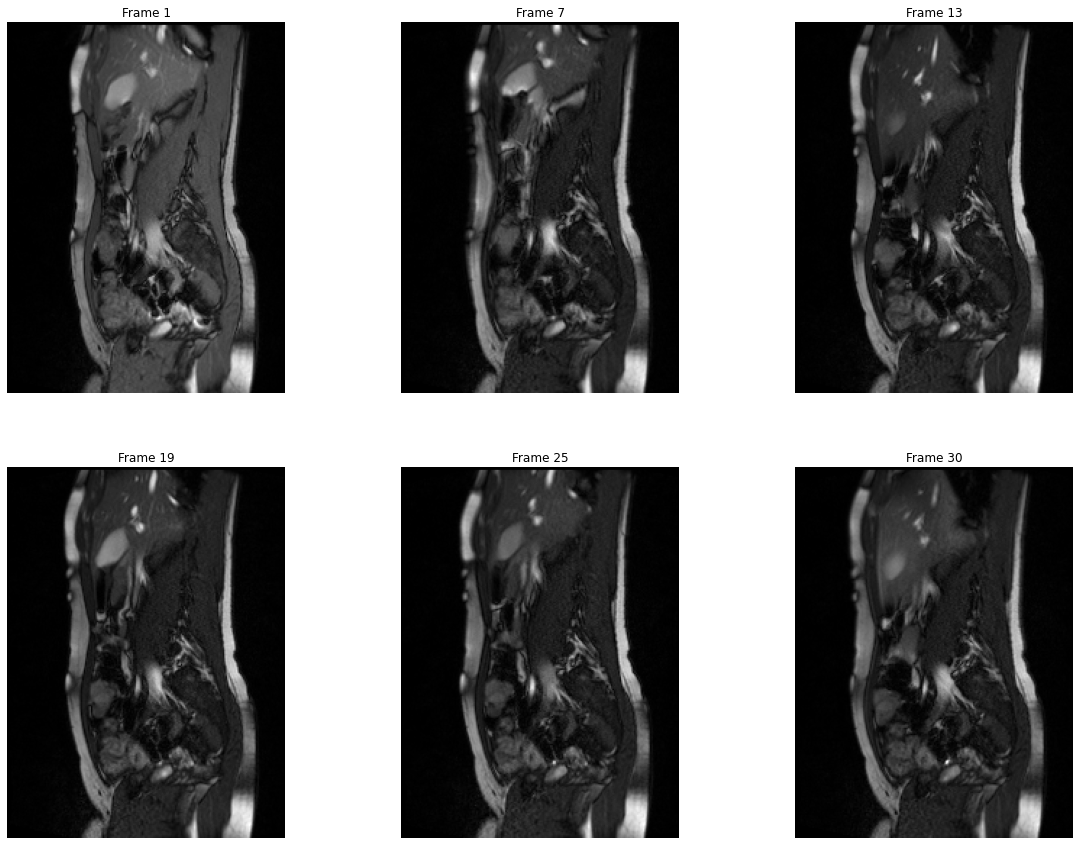

Patient ANONBL13RE1F4, scan 1.2.752.24.7.621449243.4262665, slice 1.3.12.2.1107.5.2.30.26380.2018103111453963137712504.0.0.0


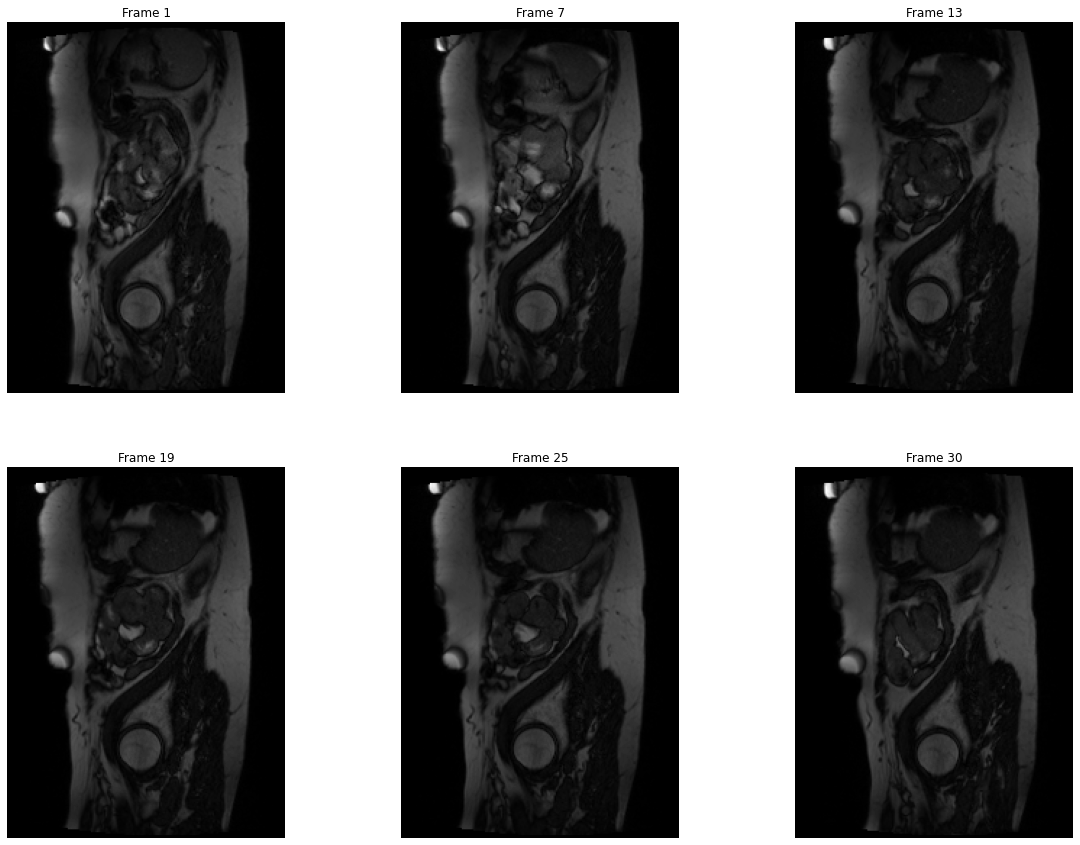

Patient ANON8AV2RE1FH, scan 1.2.752.24.7.621449243.4516751, slice 1.3.12.2.1107.5.2.30.26380.2019060315044660394768794.0.0.0


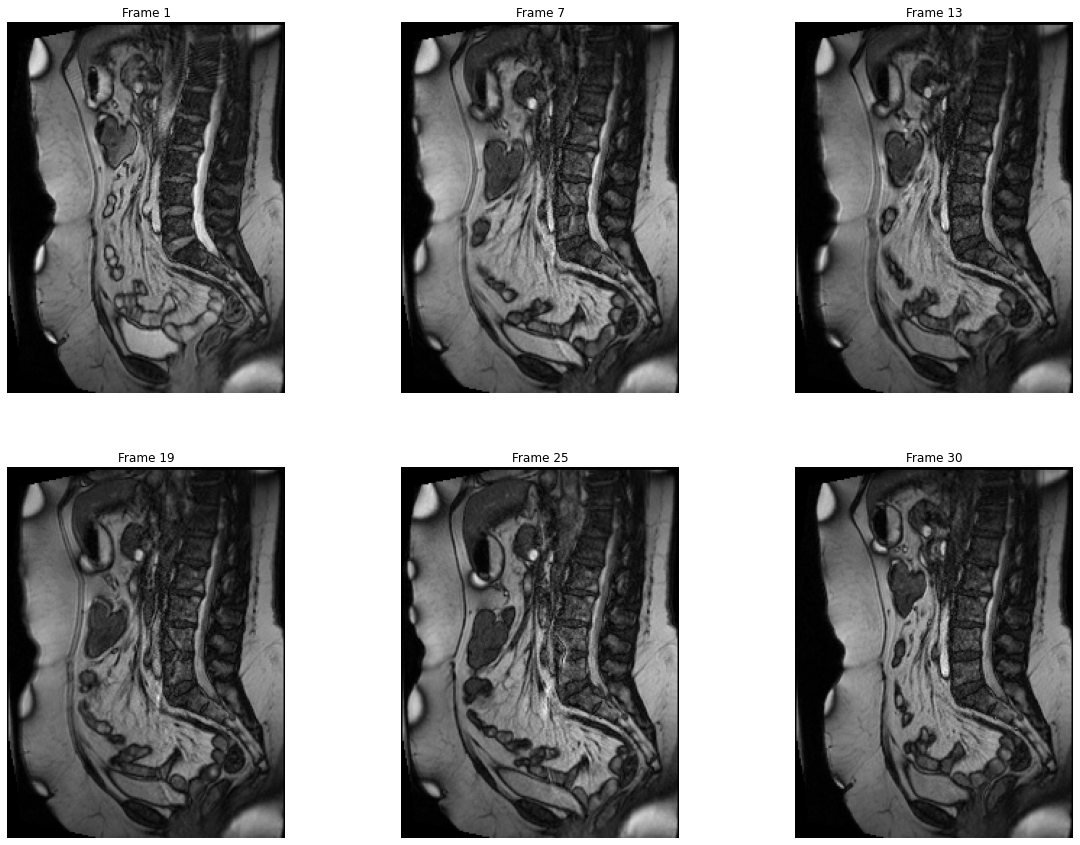

Patient ANON4I13RE1BS, scan 1.2.752.24.7.621449243.4233643, slice 1.3.12.2.1107.5.2.30.26380.2018091908523152477207782.0.0.0


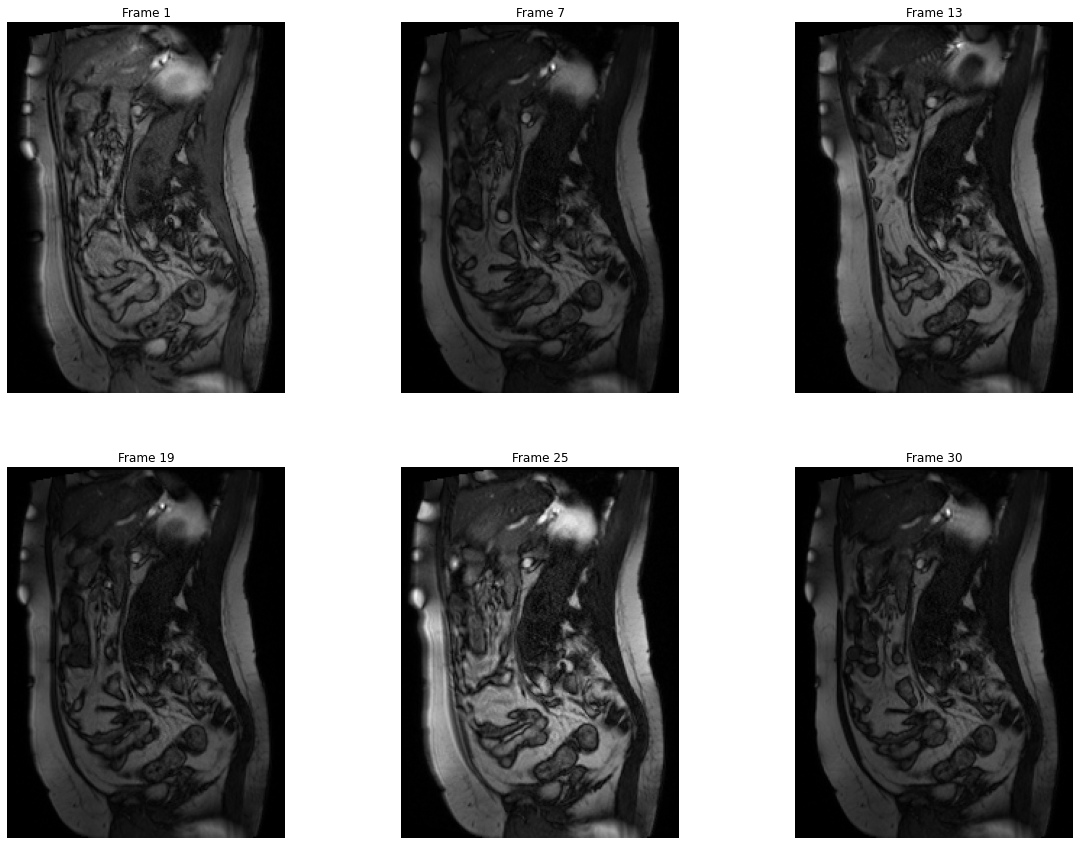

Patient ANON78V2RE1J5, scan 1.2.752.24.7.621449243.4456574, slice 1.3.12.2.1107.5.2.30.26380.201905031107289517739014.0.0.0


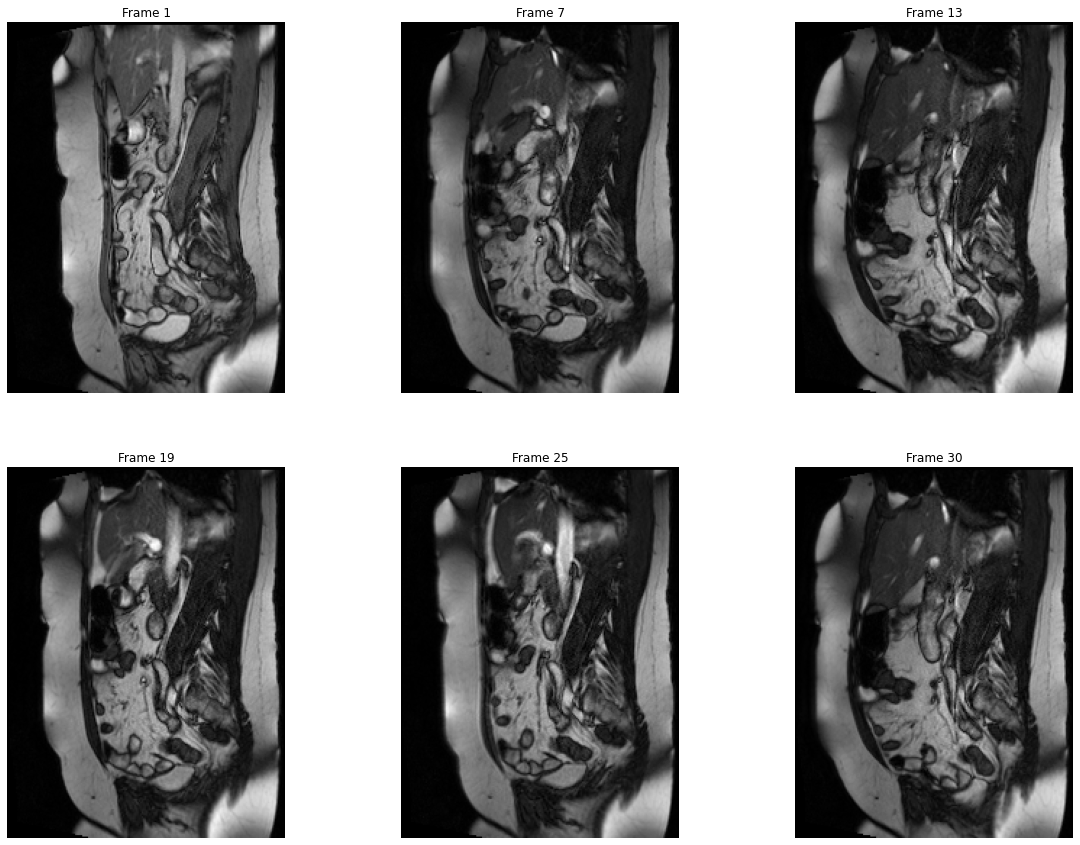

In [6]:
# Iterate over randomly selected patients, select random slice and show 6 frames from this slice
slice_paths = []

for i in range(N):
    patient = patients_to_show[i]
    cinemri_slice = random.sample(patient.cinemri_slices, 1)[0]
    print("Patient {}, scan {}, slice {}".format(patient.id, cinemri_slice.scan_id, cinemri_slice.slice_id))
    
    slice_path = cinemri_slice.build_path(archive_path / images_folder)
    slice_paths.append(slice_paths)
    
    slice = sitk.ReadImage(str(slice_path))
    slice_np = sitk.GetArrayFromImage(slice)
    show_frames(slice_np)

### Show a scan as video

In [7]:
def animated_scan(slice_np):
    fig, ax = plt.subplots()

    ims = []
    first = True
    for cine_frame in slice_np:
        im = ax.imshow(cine_frame, cmap="gray", animated=True)
        ax.axis('off')
        if first:
            first = False
            ax.imshow(cine_frame, cmap="gray")  # show an initial one first
        ims.append([im])

    ani = animation.ArtistAnimation(fig, ims, interval=200, blit=True, repeat_delay=1000)

    rc('animation', html='jshtml')
    return ani

Patient ANONVLTEPE1DL, scan 1.2.752.24.7.621449243.4325333, slice 1.3.12.2.1107.5.2.30.26380.2018120316435753343169405.0.0.0


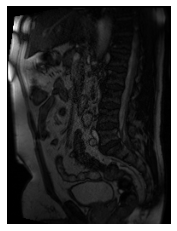

In [8]:
from matplotlib import animation, rc

patient_id, scan_id, slice_id, slice_np = get_random_slice(archive_path, images_folder, patients)
print("Patient {}, scan {}, slice {}".format(patient_id, scan_id, slice_id))

animation = animated_scan(slice_np)
animation

### Show segmentation masks over images

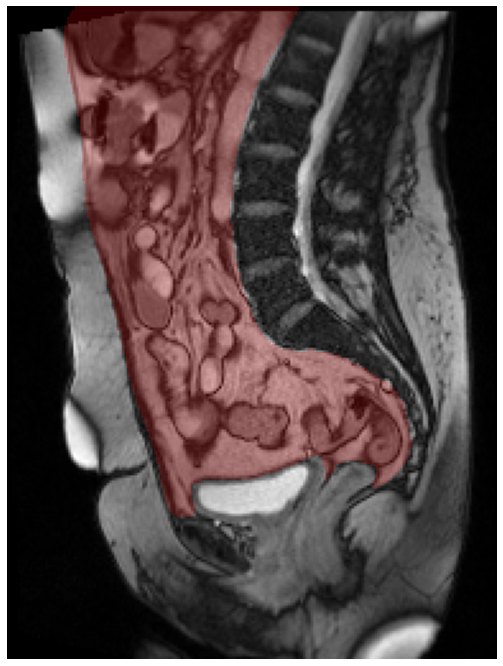

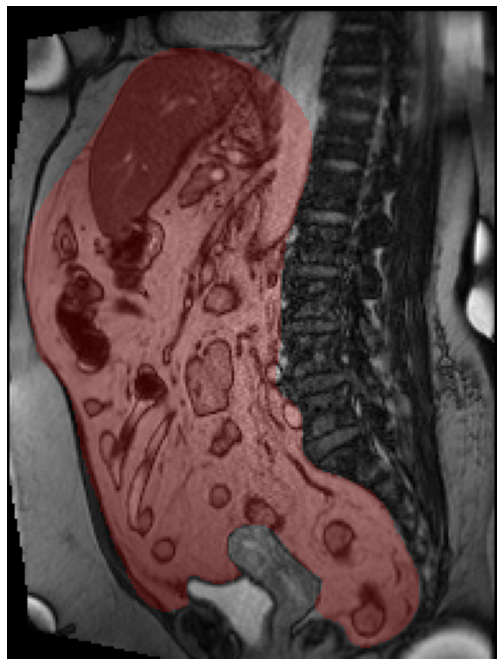

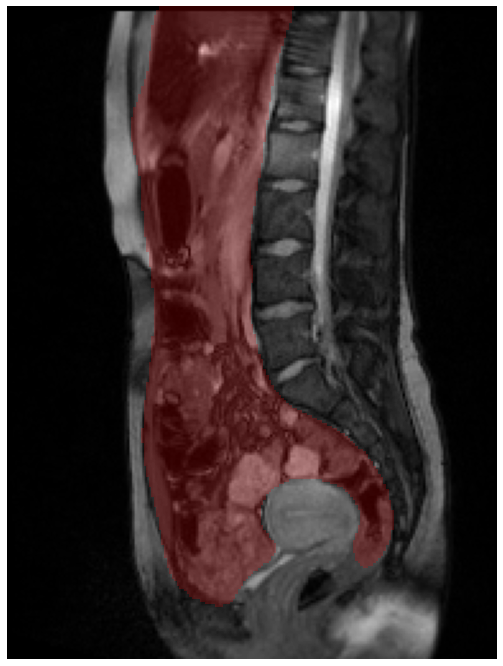

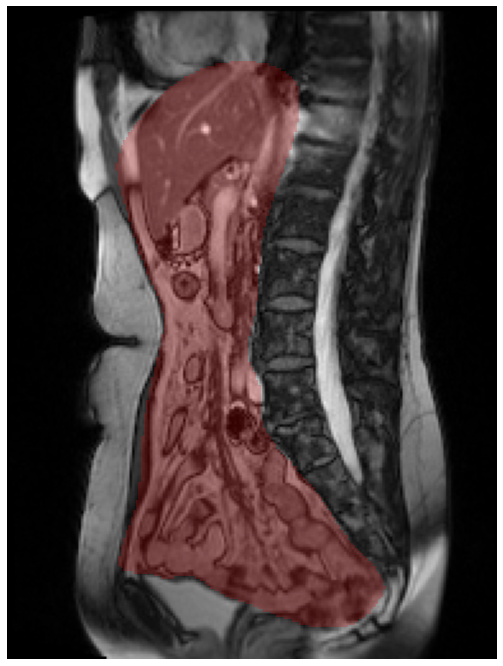

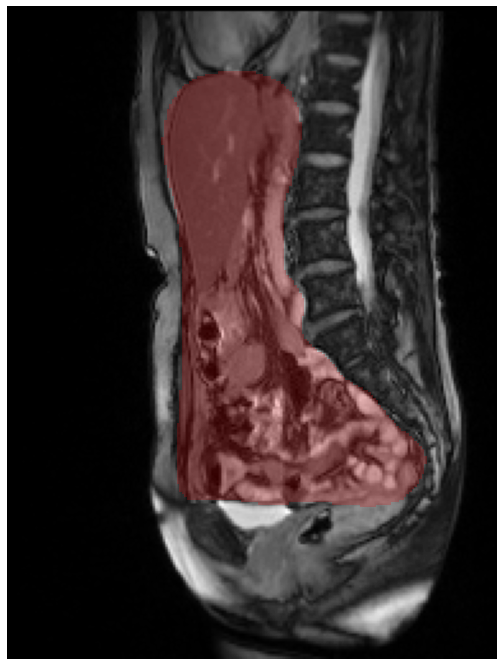

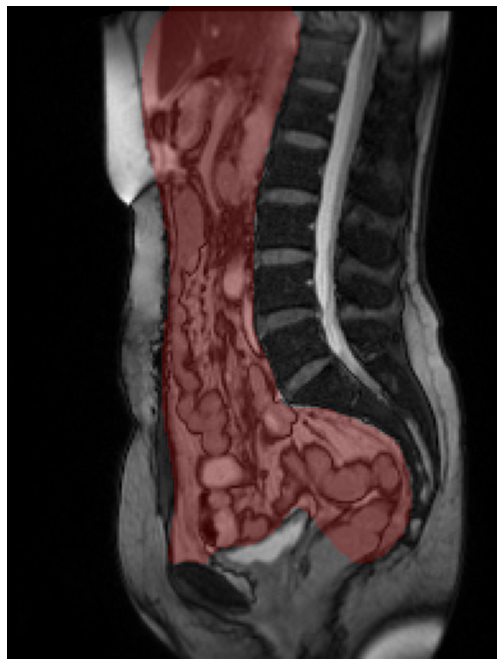

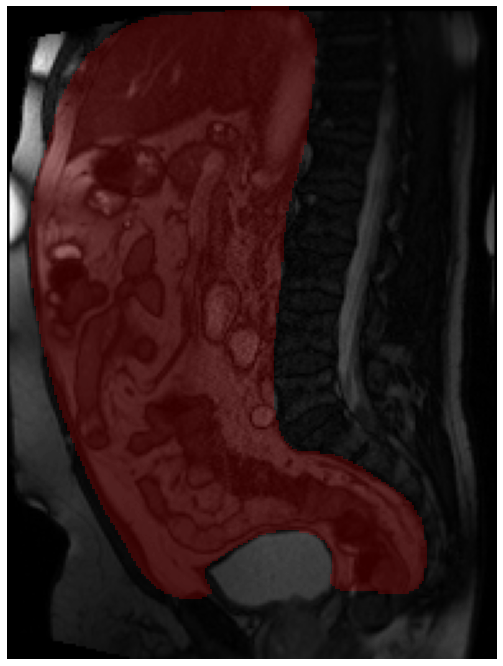

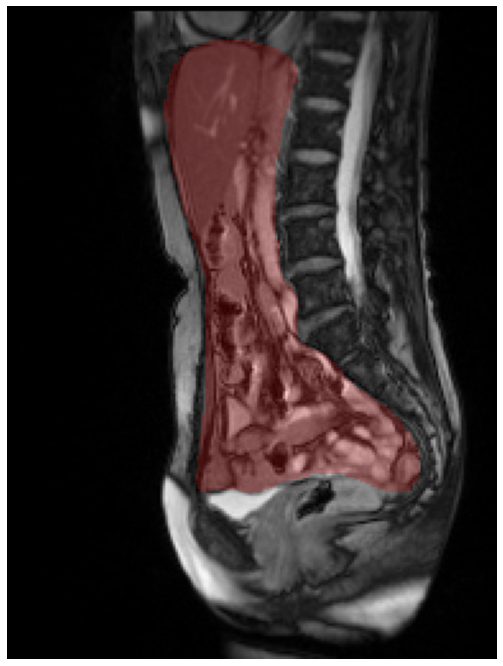

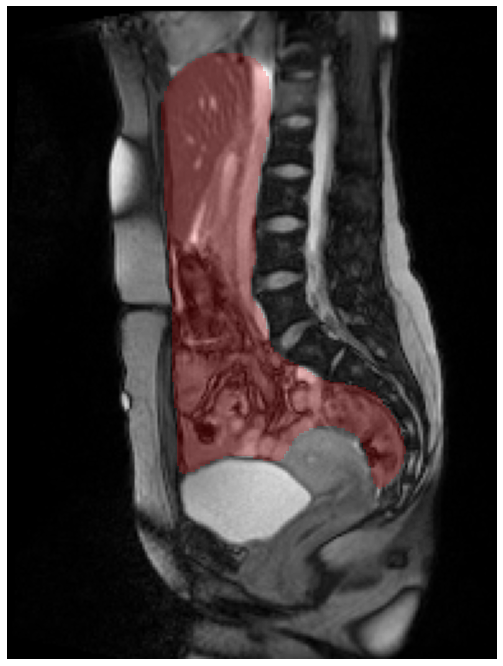

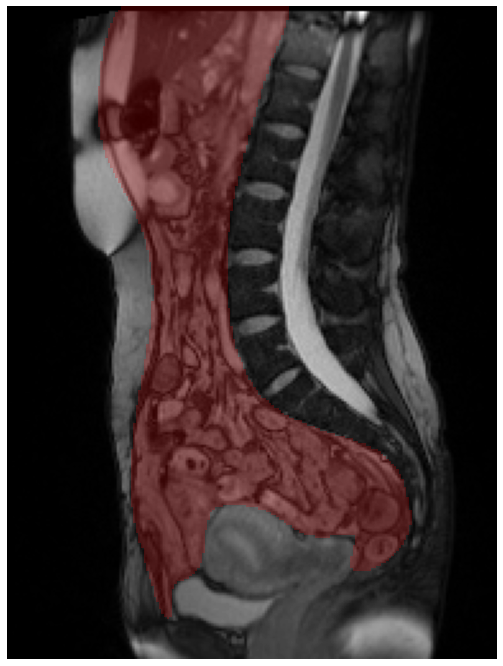

In [9]:
subset_path = Path("../../data/cinemri_mha/segmentation_subset")
dataset = SegmentationDataset(subset_path)

sample = random.sample(range(len(dataset)), 10)

for ind in sample:
    image, mask = dataset[ind]

    plt.figure(figsize=(16, 12))
    plt.imshow(image, cmap="gray")
    masked = np.ma.masked_where(mask == 0, mask)
    plt.imshow(masked, cmap='autumn', alpha=0.2)
    plt.axis('off')
    plt.show()